In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [3]:
((train_x, train_y), (test_x, test_y)) = cifar10.load_data()
train_x = train_x.astype("float") / 255.0
test_x = test_x.astype("float") / 255.0

In [4]:
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)

In [5]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
model = Sequential()
input_shape = (32, 32, 3)
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
print('Compiling the model here....')
sgd = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

Compiling the model here....


In [8]:
print("Training the model here....")
hist = model.fit(train_x, train_y, validation_data=(test_x, test_y), batch_size=32, epochs=40, verbose=1)

Training the model here....
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 23s 451us/step - loss: 1.8163 - acc: 0.3623 - val_loss: 1.6416 - val_acc: 0.4343
Epoch 2/40
50000/50000 [==============================] - 26s 513us/step - loss: 1.5786 - acc: 0.4524 - val_loss: 1.5279 - val_acc: 0.4565
Epoch 3/40
50000/50000 [==============================] - 25s 494us/step - loss: 1.4234 - acc: 0.5022 - val_loss: 1.3949 - val_acc: 0.5027
Epoch 4/40
50000/50000 [==============================] - 25s 496us/step - loss: 1.3330 - acc: 0.5323 - val_loss: 1.3746 - val_acc: 0.5040
Epoch 5/40
50000/50000 [==============================] - 27s 541us/step - loss: 1.2773 - acc: 0.5541 - val_loss: 1.2969 - val_acc: 0.5375
Epoch 6/40
50000/50000 [==============================] - 25s 504us/step - loss: 1.2355 - acc: 0.5670 - val_loss: 1.3021 - val_acc: 0.5348
Epoch 7/40
50000/50000 [==============================] - 27s 530us/step - loss: 1.2032 

In [9]:
print('Testing the model.. ')
score = model.evaluate(test_x, test_y,verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Testing the model.. 
10000/10000 [==============================] - 2s 194us/step
Test score: 1.20205554409
Test accuracy: 0.6025


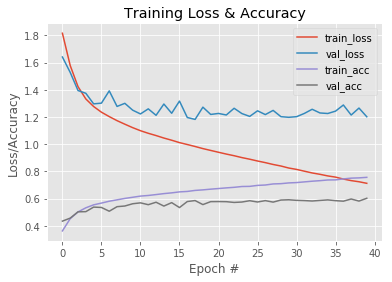

In [10]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 40), hist.history['loss'], label='train_loss')
plt.plot(np.arange(0, 40), hist.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 40), hist.history['acc'], label='train_acc')
plt.plot(np.arange(0, 40), hist.history['val_acc'], label='val_acc')
plt.title('Training Loss & Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()